# Definition of Pure and Mixed States

In quantum mechanics one of the big differences with the classical part is the property of interference in which one waveguide can interfere with another one.  
One of the ways to know in which state I am in is with the density matrix representation that gives us all the information about the entire system.  
Lest define density matrix as:

$$ \rho = | \psi \rangle \langle \psi | $$

The definition of a pure state is; a state that can be written like the previous equation is know like a pure state, in the other hand a state that can be written like a sum of pure states is define a mixed state:

$$ \rho =  \sum_i a_i | \psi_i \rangle \langle \psi_i | $$

Where:

$$ \sum_i a_i = 1 $$

The question now is; how can I differentiate a mixed state from a pure state?  
In the theoretical part we can simply apply the partial trace. But in the experimental setup one straightforward way is to measure in two difference bases as $\{|0\rangle,|1\rangle \}$ and $\{|+\rangle,|-\rangle \}$.

In this notebook we will create a pure estate and a mixed state and measure in different bases.

In [1]:
import numpy as np
import random
from collections import Counter # Library to sum dictionaries
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit.quantum_info import DensityMatrix
from qiskit import assemble, Aer, transpile, execute

Firts we created a pure state as:

$$ |\psi \rangle = \frac{1}{\sqrt{2}}(|00 \rangle + |11\rangle) $$

Lets measure the state in the $ \{| 0 \rangle,|1 \rangle \}$ basis.

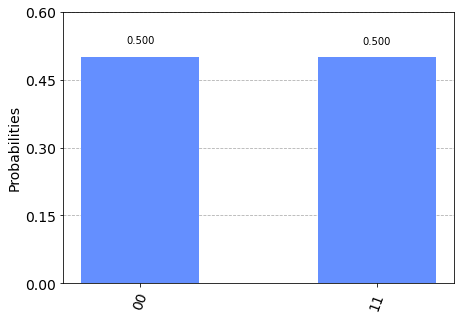

In [13]:
#Pure state
qc_pure = QuantumCircuit(2,2)
qc_pure.h(0)
qc_pure.cnot(0,1)
qc_pure.measure([0,1],[0,1])
qc_pure.draw()

Simulation = Aer.get_backend('qasm_simulator' )
Quantum_Transpiler = transpile(qc_pure,Simulation)
Quantum_Obj = assemble(Quantum_Transpiler, shots=9999)
Result = Simulation.run(Quantum_Obj).result()
Counts = Result.get_counts()
plot_histogram(Counts)

Now, we will to created a mixed state as:

$$ \rho = 0.5 |00 \rangle \langle 00 | + 0.5 |11 \rangle \langle 11 | $$

In principle this state can be created classical, in which we can assign a classical probability for the pure states $|00 \rangle$ and $|11 \rangle$ as the following circuit.  

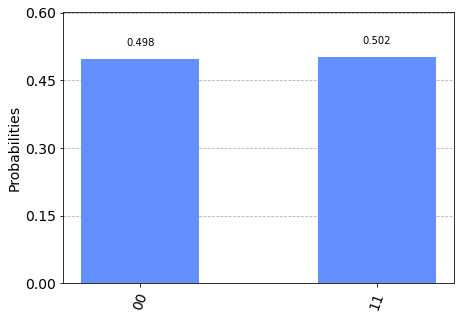

In [14]:
def Mixed_Circuit(sh):
    A = dict()
    for i in range(sh):
        s = random.random()
        if s <= 0.5 :
            qc = QuantumCircuit(2,2)
            qc.measure([0,1],[0,1])
        else:
            qc = QuantumCircuit(2,2)
            qc.x(0)
            qc.x(1)
            qc.measure([0,1],[0,1])

        Simulation = Aer.get_backend('qasm_simulator' )
        Quantum_Transpiler = transpile(qc,Simulation)
        Quantum_Obj = assemble(Quantum_Transpiler, shots=1)
        Result = Simulation.run(Quantum_Obj).result()
        Counts = Result.get_counts()

        if i == 0:
            A = Counter(Counts)
        else: 
            A += Counter(Counts)
    return A

plot_histogram(Mixed_Circuit(9999))

At this point we cant differenciate the both histogram so, lets try to measure in another base as $\{|+\rangle,|-\rangle \}$. One easy way to change the basis in a quantum circuit is to put at the final hadamard gates to measure in the $\{|+\rangle,|-\rangle \}$ which is the same as measure in the $\sigma_x$.

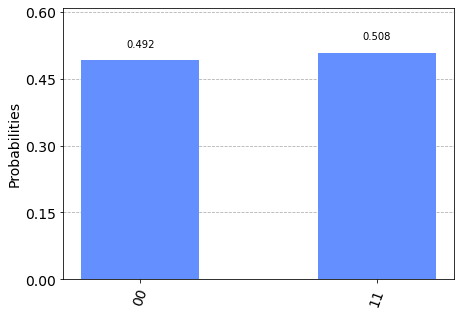

In [30]:
#Pure state
qc_pure_2 = QuantumCircuit(2,2)
qc_pure_2.h(0)
qc_pure_2.cnot(0,1)
qc_pure_2.barrier()
qc_pure_2.h(0)
qc_pure_2.h(1)
qc_pure_2.measure([0,1],[0,1])
qc_pure_2.draw()

Simulation = Aer.get_backend('qasm_simulator')
Quantum_Transpiler = transpile(qc_pure_2,Simulation)
Quantum_Obj = assemble(Quantum_Transpiler, shots=9999)
Result = Simulation.run(Quantum_Obj).result()
Counts_2 = Result.get_counts()
plot_histogram(Counts_2)

At this point the state is the same due the entanglement state is always entanglement independently of the base that we are measuring. Let's try to do the same with the second quantum circuit:

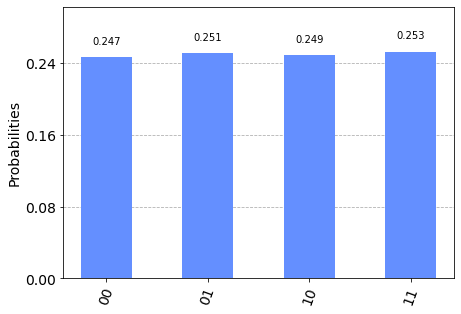

In [32]:
def Mixed_Circuit(sh):
    A = dict()
    for i in range(sh):
        s = random.random()
        if s <= 0.5 :
            qc = QuantumCircuit(2,2)
            qc.h(0)
            qc.h(1)
            qc.measure([0,1],[0,1])
        else:
            qc = QuantumCircuit(2,2)
            qc.x(0)
            qc.x(1)
            qc.h(0)
            qc.h(1)
            qc.measure([0,1],[0,1])

        Simulation = Aer.get_backend('qasm_simulator' )
        Quantum_Transpiler = transpile(qc,Simulation)
        Quantum_Obj = assemble(Quantum_Transpiler, shots=1)
        Result = Simulation.run(Quantum_Obj).result()
        Counts = Result.get_counts()

        if i == 0:
            A = Counter(Counts)
        else: 
            A += Counter(Counts)
    return A

plot_histogram(Mixed_Circuit(9999))

This is one of the ways that we can differentiate between a pure state and a mixed state.